In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Data Praprocessing

## 1.1. Data Input

In [ ]:
df_train = pd.read_csv("https://drive.google.com/uc?id=1aHBmV7ZA_lmIC9dL8P-6yCF8nqZNda-c")

In [ ]:
df_test = pd.read_csv("https://drive.google.com/uc?id=1rlx8gYDUozbpF-3dPFMil7x4gtNBOMhk")

## 1.2 Data Describe

In [ ]:
df_train.describe

<bound method NDFrame.describe of         Unnamed: 0        time_date  site  continent_id  buyer_country  \
0                0   8/11/2014 7:46     2             3             66   
1                1   8/11/2014 8:22     2             3             66   
2                2   8/11/2014 8:24     2             3             66   
3                3   8/9/2014 18:05     2             3             66   
4                4   8/9/2014 18:08     2             3             66   
...            ...              ...   ...           ...            ...   
343578    37334078  1/27/2014 19:21    37             1             69   
343579    37334079  1/27/2014 19:27    37             1             69   
343580    37334080  1/27/2014 19:38    37             1             69   
343581    37334081  1/27/2014 19:45    37             1             69   
343582    37334082  4/28/2014 23:32    37             1             69   

        buyer_region  buyer_city   distance  buyer_id  mobile  ...  children 

In [ ]:
df_test.describe

<bound method NDFrame.describe of        Unnamed: 0       id        time_date  site  continent_id  \
0               0        0   9/3/2015 17:09     2             3   
1               1        1  9/24/2015 17:38     2             3   
2               2        2   6/7/2015 15:53     2             3   
3               3        3  9/14/2015 14:49     2             3   
4               4        4   7/17/2015 9:32     2             3   
...           ...      ...              ...   ...           ...   
21013     2171326  2171326  4/28/2015 18:04     2             3   
21014     2171327  2171327  7/19/2015 16:47     2             3   
21015     2171328  2171328  4/10/2015 14:40    24             2   
21016     2171329  2171329  1/11/2015 22:23    23             1   
21017     2171330  2171330  6/10/2015 16:13    23             1   

       buyer_country  buyer_region  buyer_city   distance  buyer_id  ...  \
0                 66           174       37449  5539.0567         1  ...   
1        

In [ ]:
df_train.head(5)

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,0,8/11/2014 7:46,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,3,2,50,628,1
1,1,8/11/2014 8:22,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,1,1,2,50,628,1
2,2,8/11/2014 8:24,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,1,2,50,628,1
3,3,8/9/2014 18:05,2,3,66,442,35390,913.1932,93,0,...,0,1,14984,1,0,1,2,50,1457,80
4,4,8/9/2014 18:08,2,3,66,442,35390,913.6259,93,0,...,0,1,14984,1,0,1,2,50,1457,21


In [ ]:
df_test.head(5)

,Unnamed: 0,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,...,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
0,0,0,9/3/2015 17:09,2,3,66,174,37449,5539.0567,1,...,5/19/2016,5/23/2016,2,0,1,12243,6,6,204,27
1,1,1,9/24/2015 17:38,2,3,66,174,37449,5873.2923,1,...,5/12/2016,5/15/2016,2,0,1,14474,7,6,204,1540
2,2,2,6/7/2015 15:53,2,3,66,142,17440,3975.9776,20,...,7/26/2015,7/27/2015,4,0,1,11353,1,2,50,699
3,3,3,9/14/2015 14:49,2,3,66,258,34156,1508.5975,28,...,9/14/2015,9/16/2015,2,0,1,8250,1,2,50,628
4,4,4,7/17/2015 9:32,2,3,66,467,36345,66.7913,50,...,7/22/2015,7/23/2015,2,0,1,11812,1,2,50,538


## 1.3. Looking for Missing Value in Dataset

In [ ]:
missing_data = pd.DataFrame({'total_missing': df_train.isnull().sum(), 'perc_missing': (df_train.isnull().sum()/len(df_train.index))*100}) 
missing_data

,total_missing,perc_missing
Unnamed: 0,0,0.000000
time_date,0,0.000000
site,0,0.000000
continent_id,0,0.000000
buyer_country,0,0.000000
buyer_region,0,0.000000
buyer_city,0,0.000000
distance,197898,57.598310
buyer_id,0,0.000000
mobile,0,0.000000


In [ ]:
missing_data = pd.DataFrame({'total_missing': df_test.isnull().sum(), 'perc_missing': (df_test.isnull().sum()/len(df_test.index))*100}) 
missing_data

,total_missing,perc_missing
Unnamed: 0,0,0.00000
id,0,0.00000
time_date,0,0.00000
site,0,0.00000
continent_id,0,0.00000
buyer_country,0,0.00000
buyer_region,0,0.00000
buyer_city,0,0.00000
distance,9851,46.86935
buyer_id,0,0.00000


## 1.4. Count the values each column

In [ ]:
for column in df_train.columns:
    print("Nilai unik pada variabel "+column)
    print(df_train[column].value_counts())
    print("\n\n")

Nilai unik pada variabel Unnamed: 0
0           1
7798133     1
22514126    1
10925698    1
14079344    1
           ..
6941288     1
19501671    1
18148313    1
3244645     1
2047        1
Name: Unnamed: 0, Length: 343583, dtype: int64



Nilai unik pada variabel time_date
11/23/2014 11:37    15
7/13/2014 23:24     15
10/26/2014 16:39    13
10/25/2014 14:15    13
4/21/2013 1:51      11
                    ..
12/10/2014 6:08      1
5/15/2014 9:14       1
9/20/2014 22:51      1
8/13/2014 23:42      1
7/14/2013 18:56      1
Name: time_date, Length: 255587, dtype: int64



Nilai unik pada variabel site
2     117070
24    110851
37     16744
23     15969
8      15963
13     12015
34     10685
11      8788
28      7174
25      3913
17      3740
30      3147
15      2492
33      2476
18      2304
35      2063
26      1866
20      1334
27      1331
22      1226
10       822
31       506
36       451
7        403
48       121
6         64
47        39
46        22
19         2
16         2
Nam

In [ ]:
for column in df_test.columns:
    print("Nilai unik pada variabel "+column)
    print(df_test[column].value_counts())
    print("\n\n")

Nilai unik pada variabel Unnamed: 0
0          1
1447256    1
2168770    1
2170873    1
1447737    1
          ..
1446223    1
2169062    1
1808188    1
362590     1
2047       1
Name: Unnamed: 0, Length: 21018, dtype: int64



Nilai unik pada variabel id
0          1
1447256    1
2168770    1
2170873    1
1447737    1
          ..
1446223    1
2169062    1
1808188    1
362590     1
2047       1
Name: id, Length: 21018, dtype: int64



Nilai unik pada variabel time_date
11/2/2015 11:53    3
2/19/2015 18:27    3
1/26/2015 19:14    3
2/27/2015 11:11    3
6/20/2015 18:05    3
                  ..
11/17/2015 8:08    1
4/17/2015 22:16    1
7/21/2015 1:03     1
10/26/2015 9:59    1
6/16/2015 19:36    1
Name: time_date, Length: 20479, dtype: int64



Nilai unik pada variabel site
2     9356
24    4389
37    1109
13    1018
8      941
11     797
23     749
34     690
28     566
30     190
25     189
17     176
26     147
33     133
18     107
15     104
10      79
20      68
27      51
35     

Ada berberapa langkah yang harus dilakukan :

-Ngilangin row yang ada missing valuenya (buying_date, dealing_date)

-Ngilangin coloumn yang missing valuenya banyak (Distance)

-swapping Regency_continent and regency_country 

-Buat fitur baru buat handling time series :

 -Jeda hari antara time_date dengan buying_date
 
 -Jeda hari antara time_date dengan dealing_date
 
 -Jeda hari antara buying_date dengan dealing_date
 
 -Hapus time series
 
-person = adult + child

-Jumlahin adult dan child terus dibagi sama roomnya (person/room ratio)

In [ ]:
#Menghapus Kolom yang ada missing valuenya
df_train = df_train.drop(columns=["distance"])
df_test = df_test.drop(columns=["distance"])

In [ ]:
#Menghapus Row yang ada missing valuenya
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [ ]:
df_train.head(10)

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,buyer_id,mobile,package,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,0,8/11/2014 7:46,2,3,66,348,48862,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,1,8/11/2014 8:22,2,3,66,348,48862,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2,8/11/2014 8:24,2,3,66,348,48862,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,3,8/9/2014 18:05,2,3,66,442,35390,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,4,8/9/2014 18:08,2,3,66,442,35390,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
5,5,8/9/2014 18:13,2,3,66,442,35390,93,0,0,...,0,1,14984,1,0,1,2,50,1457,92
6,6,7/16/2014 9:42,2,3,66,189,10067,501,0,0,...,0,1,8267,1,0,2,2,50,675,41
7,7,7/16/2014 9:45,2,3,66,189,10067,501,0,1,...,0,1,8267,1,0,1,2,50,675,41
8,8,7/16/2014 9:52,2,3,66,189,10067,501,0,0,...,0,1,8267,1,0,1,2,50,675,69
9,9,7/16/2014 9:55,2,3,66,189,10067,501,0,0,...,0,1,8267,1,0,1,2,50,675,70


In [ ]:
df_test.head(10)

,Unnamed: 0,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,buyer_id,mobile,...,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
0,0,0,9/3/2015 17:09,2,3,66,174,37449,1,1,...,5/19/2016,5/23/2016,2,0,1,12243,6,6,204,27
1,1,1,9/24/2015 17:38,2,3,66,174,37449,1,1,...,5/12/2016,5/15/2016,2,0,1,14474,7,6,204,1540
2,2,2,6/7/2015 15:53,2,3,66,142,17440,20,0,...,7/26/2015,7/27/2015,4,0,1,11353,1,2,50,699
3,3,3,9/14/2015 14:49,2,3,66,258,34156,28,0,...,9/14/2015,9/16/2015,2,0,1,8250,1,2,50,628
4,4,4,7/17/2015 9:32,2,3,66,467,36345,50,0,...,7/22/2015,7/23/2015,2,0,1,11812,1,2,50,538
5,5,5,7/21/2015 11:58,2,3,66,311,48189,51,0,...,7/22/2015,7/24/2015,4,0,2,11827,1,2,50,447
6,6,6,7/29/2015 7:58,2,3,66,311,48189,51,0,...,8/2/2015,8/3/2015,2,0,1,8271,1,2,50,696
7,7,7,8/1/2015 20:13,2,3,66,348,24811,51,0,...,8/3/2015,8/4/2015,2,0,1,8291,1,2,50,191
8,8,8,11/7/2015 12:29,2,3,66,311,48189,51,0,...,12/30/2015,12/31/2015,2,0,1,8250,1,2,50,628
9,9,9,11/8/2015 16:21,2,3,66,311,48189,51,0,...,1/2/2016,1/3/2016,2,0,1,9145,1,2,50,364


In [ ]:
df_train.sample(10)

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,buyer_id,mobile,package,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
128580,14496693,9/8/2013 17:01,24,2,3,58,48893,9741,0,0,...,1,1,20408,1,0,1,3,82,228,61
87888,8954749,11/5/2014 14:32,24,2,3,50,5703,2545,0,0,...,0,2,8286,1,1,1,0,63,1258,55
125118,14079728,5/12/2014 12:31,2,3,66,447,26008,8998,0,0,...,3,1,8855,1,0,1,2,50,213,40
44546,5114748,8/27/2014 16:15,13,1,46,171,28694,9878,0,1,...,0,2,8245,1,0,1,6,22,245,58
254261,28820052,8/9/2014 19:39,2,3,66,311,43558,71,1,1,...,0,1,11334,1,0,1,4,96,201,26
25775,3245914,10/28/2014 16:05,24,2,3,50,50576,9142,1,0,...,0,1,8245,1,0,1,6,22,245,36
34158,4180647,1/27/2013 23:34,24,2,3,50,5703,6517,0,0,...,0,1,669,3,0,1,2,50,212,84
221015,23154776,5/7/2014 8:23,24,2,3,51,39770,2060,0,0,...,0,1,14804,1,0,3,6,77,774,59
93180,9301398,11/23/2014 22:07,8,4,77,824,53145,4420,0,0,...,0,1,5405,6,0,1,4,8,126,90
78406,8205015,1/23/2014 20:06,18,2,231,68,42296,1293,0,0,...,0,1,8809,1,0,1,2,50,698,95


In [ ]:
#Menghapus Kolom yang tidak penting
df_train = df_train.drop(columns=["Unnamed: 0"])
df_test = df_test.drop(columns=["Unnamed: 0"])

In [ ]:
df_train = df_train.rename(columns={"regency_country": "regency_continent", "regency_continent": "regency_country"})

In [ ]:
column_=["regency_country","regency_continent"]
for column in column_:
    print("Nilai unik pada variabel "+column)
    print(df_train[column].value_counts())
    print("\n\n")

Nilai unik pada variabel regency_country
1     254344
2      52019
3      18934
4       7767
5       4022
6       2145
7       1274
8        787
9        482
10       319
11       212
12       147
13        96
14        80
15        70
16        51
17        28
18        23
19        18
20        15
21        10
23         6
22         5
33         5
24         4
25         3
30         3
44         2
36         2
37         2
38         1
45         1
42         1
39         1
31         1
29         1
28         1
27         1
26         1
47         1
Name: regency_country, dtype: int64



Nilai unik pada variabel regency_continent
2    128103
3     92849
6     84275
4     25077
0      9151
5      3430
Name: regency_continent, dtype: int64





In [ ]:
df_train.head()

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,buyer_id,mobile,package,channel_id,...,children,room,destination_id,destination_type,dealing,regency_country,regency_continent,regency_market,cnt,regency_cluster
0,8/11/2014 7:46,2,3,66,348,48862,12,0,1,9,...,0,1,8250,1,0,3,2,50,628,1
1,8/11/2014 8:22,2,3,66,348,48862,12,0,1,9,...,0,1,8250,1,1,1,2,50,628,1
2,8/11/2014 8:24,2,3,66,348,48862,12,0,0,9,...,0,1,8250,1,0,1,2,50,628,1
3,8/9/2014 18:05,2,3,66,442,35390,93,0,0,3,...,0,1,14984,1,0,1,2,50,1457,80
4,8/9/2014 18:08,2,3,66,442,35390,93,0,0,3,...,0,1,14984,1,0,1,2,50,1457,21


In [ ]:
#Handling time series
import datetime

df_train['time_date'] = pd.to_datetime(df_train['time_date']).dt.strftime("%m/%d/%y")
df_test['time_date'] = pd.to_datetime(df_test['time_date']).dt.strftime("%m/%d/%y")

#Ubah tipe data
df_train['time_date'] = pd.to_datetime(df_train['time_date'])
df_test['time_date'] = pd.to_datetime(df_test['time_date'])

df_train["buying_date"] = pd.to_datetime(df_train['buying_date'])
df_test["buying_date"] = pd.to_datetime(df_test['buying_date'])

df_train["dealing_date"] = pd.to_datetime(df_train['dealing_date'])
df_test["dealing_date"] = pd.to_datetime(df_test['dealing_date'])

In [ ]:
#Selisih time_date x buying_date
df_train["dif_td_bd"] = abs(df_train['time_date'] - df_train['buying_date'])
df_test["dif_td_bd"] = abs(df_test['time_date'] - df_test['buying_date'])

#Selisih time_date x buying_date
df_train["dif_td_dd"] = abs(df_train['time_date'] - df_train['dealing_date'])
df_test["dif_td_dd"] = abs(df_test['time_date'] - df_test['dealing_date'])

#Selisih dealing_date x buying_date
df_train["dif_bd_dd"] = abs(df_train['buying_date'] - df_train['dealing_date'])
df_test["dif_bd_dd"] = abs(df_test['buying_date'] - df_test['dealing_date'])

# 2. Feature Engineering

In [ ]:
#Jumlahin Adult sama Child jadi person
df_train["person"] = df_train["adults"] + df_train["children"]
df_test["person"] = df_test["adults"] + df_test["children"]

#person/room ratio
df_train["person_per_room"] = df_train["person"]/df_train["room"]
df_test["person_per_room"] = df_test["person"]/df_test["room"]

In [ ]:
days = ["dif_td_bd", "dif_td_dd", "dif_bd_dd"]

for y in days :
    df_train[y] = df_train[y].dt.days
    df_test[y] = df_test[y].dt.days
    df_train[y].astype(int)
    df_test[y].astype(int)

categorical = ["site", "continent_id", "buyer_country", "buyer_region","buyer_city", "buyer_id", "mobile", "package", "channel_id", "destination_id", "destination_type", "dealing", "regency_continent", "regency_country","regency_market","person_per_room"]
target = df_train["regency_cluster"]

df_train_num = df_train.drop(columns=categorical)
df_train_cat = df_train[categorical]

df_train_num.head(5)

,time_date,buying_date,dealing_date,adults,children,room,cnt,regency_cluster,dif_td_bd,dif_td_dd,dif_bd_dd,person
0,2014-08-11,2014-08-27,2014-08-31,2,0,1,628,1,16,20,4,2
1,2014-08-11,2014-08-29,2014-09-02,2,0,1,628,1,18,22,4,2
2,2014-08-11,2014-08-29,2014-09-02,2,0,1,628,1,18,22,4,2
3,2014-08-09,2014-11-23,2014-11-28,2,0,1,1457,80,106,111,5,2
4,2014-08-09,2014-11-23,2014-11-28,2,0,1,1457,21,106,111,5,2


In [ ]:
#df_train_num = df_train_num.drop(columns=days)
df_train = df_train.drop(columns=["time_date","buying_date","dealing_date","regency_cluster"])
#df_test = df_test.drop(columns=days)
df_test = df_test.drop(columns=["time_date","buying_date","dealing_date"])

# 3. Feature Selection

In [ ]:
def select_features_cat(X_train, y_train):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    #X_test_fs = fs.transform(X_test)
    return X_train_fs, fs #X_test_fs

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X_train_fs_cat, fs_cat = select_features_cat(df_train, target)

i=0
for x in df_train.columns:
    print('Feature %s: %f' % (x, fs_cat.scores_[i]))
    i=i+1

Feature site: 0.126822
Feature continent_id: 0.106946
Feature buyer_country: 0.164432
Feature buyer_region: 0.234417
Feature buyer_city: 0.512196
Feature buyer_id: 1.005259
Feature mobile: 0.000000
Feature package: 0.029965
Feature channel_id: 0.016705
Feature adults: 0.026663
Feature children: 0.011576
Feature room: 0.000330
Feature destination_id: 1.417642
Feature destination_type: 0.031619
Feature dealing: 0.004621
Feature regency_country: 0.004115
Feature regency_continent: 0.427780
Feature regency_market: 0.759905
Feature cnt: 1.344489
Feature dif_td_bd: 0.057907
Feature dif_td_dd: 0.058861
Feature dif_bd_dd: 0.054970
Feature person: 0.030229
Feature person_per_room: 0.037622


Text(0.5, 1.0, 'Feature importances')

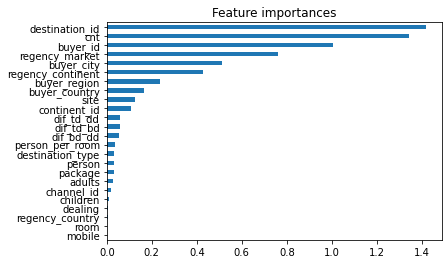

In [ ]:
import matplotlib.pyplot as plt

(pd.Series(fs_cat.scores_, index=df_train.columns).sort_values(ascending= True)
   .plot(kind='barh'))
plt.title('Feature importances')

In [ ]:
#from sklearn.feature_selection import f_classif

#def select_features_num(X_train, y_train):
    #fs = SelectKBest(score_func=f_classif, k='all')
    #fs.fit(X_train, y_train)
    #X_train_fs = fs.transform(X_train)
    #X_test_fs = fs.transform(X_test)
    #return X_train_fs, fs #X_test_fs

#X_train_fs_num, fs_num = select_features_num(df_train_num, target)

#i=0
#for x in df_train_num.columns:
    #print('Feature %s: %f' % (x, fs_num.scores_[i]))
    #i=i+1


#(pd.Series(fs_num.scores_, index=df_train_num.columns).sort_values(ascending= True)
   #.plot(kind='barh'))
#plt.title('Feature importances numerical data')

In [ ]:
#sel_cat = ["destination_id", "buyer_id","buyer_city","regency_continent","regency_market"]
#sel_cat = ["destination_id"]
#sel_num = ["person_per_room"]#,"dif_td_dd","dif_bd_dd"]

#data testnya jangan lupa
#df1 = df_train_cat[sel_cat]
#df2 = df_train_num[sel_num]


train = df_train
#import math
train["regency_cluster"] = target
    
y = pd.get_dummies(train.regency_cluster, prefix='is')
train = pd.concat([train,y], axis=1, join='inner')
test = df_test
train_ = df_train

In [ ]:
for x in range(0,100) :
    mean = train['is_'+str(x)].mean()
    mean_encode = train.groupby('destination_id')['is_'+str(x)].mean()
    train_['destination_id_enc_'+str(x)] = train['destination_id'].map(mean_encode).fillna(mean)
    test['destination_id_enc_'+str(x)] = test['destination_id'].map(mean_encode).fillna(mean)

In [ ]:
sel = []
for x in range(0,99) :
    x=str(x)
    sel.append("destination_id_enc_"+x)
sel.append("buyer_id")
sel.append("regency_market")
sel.append("buyer_city")
sel.append("regency_continent")

In [ ]:
#Saving Id value
Id = test["id"]

train_ = train_[sel]
pred = test[sel]

In [ ]:
train.columns

Index(['site', 'continent_id', 'buyer_country', 'buyer_region', 'buyer_city',
       'buyer_id', 'mobile', 'package', 'channel_id', 'adults',
       ...
       'is_90', 'is_91', 'is_92', 'is_93', 'is_94', 'is_95', 'is_96', 'is_97',
       'is_98', 'is_99'],
      dtype='object', length=125)

In [ ]:
mode = train["regency_cluster"].mode()
mode_encode = train.groupby("buyer_id")['regency_cluster'].agg(lambda x:x.value_counts().index[0])
train_["buyer_id_enc"] = train["buyer_id"].map(mode_encode).fillna(mode)
pred["buyer_id_enc"] = pred["buyer_id"].map(mode_encode).fillna(mode)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_ =train_.drop(columns="buyer_id")
pred = pred.drop(columns="buyer_id")

In [ ]:
#sel_cat = ["destination_id"]
#sel_num = ["regency_market"]
#sel_feature = ["buyer_id_enc","destination_id_enc","buyer_city_enc","regency_market_enc"]
#sel_feature = ["destination_id","buyer_id","buyer_city","regency_continent","regency_market","buyer_id_enc","destination_id_enc","buyer_city_enc","regency_market_enc","regency_continent_enc"]
#train = train[sel_feature]

#train_ = train_.drop(columns=["buyer_id","regency_cluster"])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_, target, train_size = 0.8,test_size=0.2, random_state=123,stratify = target)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#over = SMOTE()
#under = RandomUnderSampler()
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X_train, y_train = over.fit_resample(X_train, y_train)

In [ ]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#X_train = X
#y_train = y

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# 4. Modelling

In [ ]:
#Modeling
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression

#model = GaussianNB()
model = DecisionTreeClassifier()
#model = LogisticRegression(solver='liblinear')
#model = OneVsRestClassifier(model)


#model = RandomForestClassifier()
#model = GradientBoostingClassifier()
#model = KNeighborsClassifier()
#model = ExtraTreesClassifier()
#model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy : ', "%.2f" % (accuracy*100))
#print('F1 : ', "%.2f" % (f1*100))

Accuracy :  31.46


# 5. Validating

In [ ]:
#Cross-Validation
scoring = {'accuracy' : make_scorer(accuracy_score)}
           #'precision' : make_scorer(precision_score),
           #'recall' : make_scorer(recall_score)}
           #'f1_score' : make_scorer(f1_score(average='weighted'))}
kfold = KFold(n_splits=5, random_state=1234, shuffle = True)
results_clf = cross_validate(estimator=model,X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring=scoring)
results_clf

{'fit_time': array([10.55016828, 10.51996064, 10.61088133,  9.77059388, 10.12751746]),
 'score_time': array([0.10237408, 0.10242343, 0.10260296, 0.10043049, 0.10000348]),
 'test_accuracy': array([0.29479421, 0.29705443, 0.29734607, 0.29715098, 0.30086947])}

In [ ]:
a = results_clf.get('test_accuracy')
print('Validation Mean Accuracy : ', "%.2f" % (a.mean()*100))

Validation Mean Accuracy :  29.74


# 6. Submission

In [ ]:
#Submission
Id.to_numpy()
Y_pred = model.predict(pred)
submission = pd.DataFrame({
    "id": Id,
    "regency_cluster": Y_pred
    })
submission.to_csv("submission.csv", index=False)

In [ ]:
submission

,id,regency_cluster
0,0,8
1,1,91
2,2,0
3,3,24
4,4,48
...,...,...
21013,2171326,51
21014,2171327,7
21015,2171328,3
21016,2171329,75
